<a href="https://colab.research.google.com/github/Deepti-Shringare/Downscaling_no2map_api_RR/blob/main/datasetreading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 28.3 MB/s eta 0:00:00
Mounted at /content/drive
NO2 Data Shape: (12, 12)
NO2 CRS: EPSG:4326


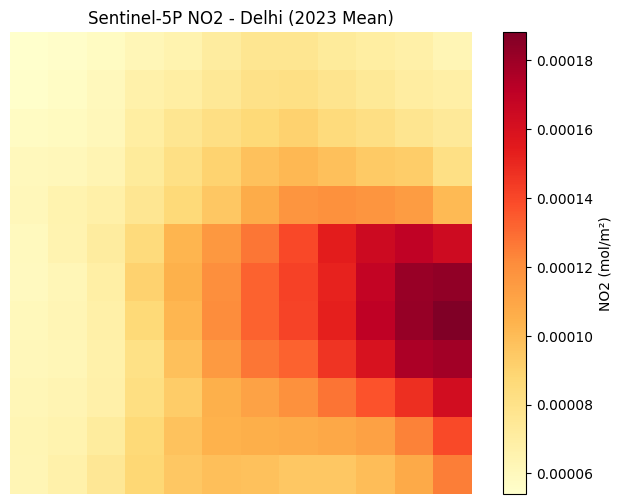

In [ ]:
#satelllite dataset
# Install required packages
!pip install rasterio matplotlib geopandas

import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Replace this path with your actual file location
tif_path = '/content/drive/MyDrive/satellite_dataset_delhi/NO2_Delhi_2023_Mean.tif'

# Open GeoTIFF
with rasterio.open(tif_path) as src:
    no2_data = src.read(1)
    no2_bounds = src.bounds
    no2_crs = src.crs
    no2_transform = src.transform

print(f"NO2 Data Shape: {no2_data.shape}")
print(f"NO2 CRS: {no2_crs}")

# Visualize NO2 Map
plt.figure(figsize=(8,6))
plt.imshow(no2_data, cmap='YlOrRd')
plt.title('Sentinel-5P NO2 - Delhi (2023 Mean)')
plt.colorbar(label='NO2 (mol/m²)')
plt.axis('off')
plt.show()


In [ ]:
import geopandas as gpd
import rasterio
import matplotlib.pyplot as plt
import numpy as np

# Mount Drive if needed
from google.colab import drive
drive.mount('/content/drive')

# --- Load NO2 GeoTIFF ---
tif_path = '/content/drive/MyDrive/satellite_dataset_delhi/NO2_Delhi_2023_Mean.tif'

with rasterio.open(tif_path) as src:
    no2_data = src.read(1)
    no2_bounds = src.bounds
    no2_transform = src.transform
    no2_crs = src.crs

# --- Load India State Boundaries Shapefile ---
# Example path (replace with your actual shapefile location and .shp extension)
shapefile_path = '/content/drive/MyDrive/satellite_dataset_delhi/Admin2.shp' # Corrected extension
gdf = gpd.read_file(shapefile_path)

# --- Filter Delhi Only ---
delhi_boundary = gdf[gdf['state_name'].str.lower() == 'delhi']

# Ensure CRS match
delhi_boundary = delhi_boundary.to_crs(no2_crs)

# --- Plot NO2 with State Boundary Overlay ---
fig, ax = plt.subplots(figsize=(8, 8))

# Plot NO2 Raster
extent = [no2_bounds.left, no2_bounds.right, no2_bounds.bottom, no2_bounds.top]
cmap = plt.cm.YlOrRd

im = ax.imshow(no2_data, extent=extent, cmap=cmap)
plt.colorbar(im, ax=ax, label='NO2 (mol/m²)')

# Plot Delhi Boundary Outline
delhi_boundary.boundary.plot(ax=ax, edgecolor='blue', linewidth=2)

plt.title('NO2 Concentration with Delhi Boundary (2023)')
plt.axis('off')
plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


KeyError: 'state_name'

In [ ]:
import geopandas as gpd
import rasterio
import matplotlib.pyplot as plt
import numpy as np

# Mount Drive
from google.colab import drive
drive.mount('/content/drive')

# --- Load NO2 GeoTIFF ---
tif_path = '/content/drive/MyDrive/satellite_dataset_delhi/NO2_Delhi_2023_Mean.tif'

with rasterio.open(tif_path) as src:
    no2_data = src.read(1)
    no2_bounds = src.bounds
    no2_transform = src.transform
    no2_crs = src.crs

# --- Load India State Boundaries Shapefile ---
shapefile_path = '/content/drive/MyDrive/satellite_dataset_delhi/Admin2.shp'
gdf = gpd.read_file(shapefile_path)

# Check column names
print(gdf.columns)

# Filter Delhi boundary (Correct column name)
# Change 'NAME_1' to whatever matches your file
delhi_boundary = gdf[gdf['NAME_1'].str.lower() == 'delhi']

# Ensure CRS matches
delhi_boundary = delhi_boundary.to_crs(no2_crs)

# --- Plot NO2 with Delhi Boundary Overlay ---
fig, ax = plt.subplots(figsize=(8, 8))

# Plot NO2 Raster
extent = [no2_bounds.left, no2_bounds.right, no2_bounds.bottom, no2_bounds.top]
cmap = plt.cm.YlOrRd

im = ax.imshow(no2_data, extent=extent, cmap=cmap)
plt.colorbar(im, ax=ax, label='NO2 (mol/m²)')

# Plot Delhi Boundary
delhi_boundary.boundary.plot(ax=ax, edgecolor='blue', linewidth=2)

plt.title('NO2 Concentration with Delhi Boundary (2023)')
plt.axis('off')
plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Index(['ST_NM', 'geometry'], dtype='object')


KeyError: 'NAME_1'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Index(['ST_NM', 'geometry'], dtype='object')


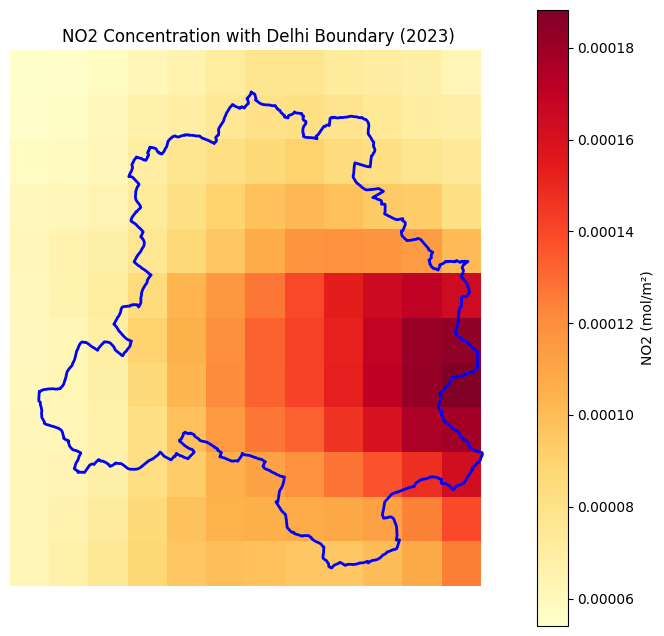

In [ ]:
import geopandas as gpd
import rasterio
import matplotlib.pyplot as plt
import numpy as np

# Mount Drive (skip if already mounted)
from google.colab import drive
drive.mount('/content/drive')

# --- Load NO2 GeoTIFF ---
tif_path = '/content/drive/MyDrive/satellite_dataset_delhi/NO2_Delhi_2023_Mean.tif'

with rasterio.open(tif_path) as src:
    no2_data = src.read(1)
    no2_bounds = src.bounds
    no2_transform = src.transform
    no2_crs = src.crs

# --- Load State Boundaries Shapefile ---
shapefile_path = '/content/drive/MyDrive/satellite_dataset_delhi/Admin2.shp'
gdf = gpd.read_file(shapefile_path)

# Check columns (you already did this - confirmed 'ST_NM' exists)
print(gdf.columns)

# --- Filter Delhi Boundary ---
delhi_boundary = gdf[gdf['ST_NM'].str.lower() == 'delhi']

# Reproject Delhi boundary to match NO2 raster CRS
delhi_boundary = delhi_boundary.to_crs(no2_crs)

# --- Plot NO2 with Delhi Boundary Overlay ---
fig, ax = plt.subplots(figsize=(8, 8))

# Plot NO2 Raster
extent = [no2_bounds.left, no2_bounds.right, no2_bounds.bottom, no2_bounds.top]
cmap = plt.cm.YlOrRd

im = ax.imshow(no2_data, extent=extent, cmap=cmap)
plt.colorbar(im, ax=ax, label='NO2 (mol/m²)')

# Plot Delhi Boundary Outline
delhi_boundary.boundary.plot(ax=ax, edgecolor='blue', linewidth=2)

plt.title('NO2 Concentration with Delhi Boundary (2023)')
plt.axis('off')
plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Unique land cover class codes in Delhi: [ 0 10 20 30 40 50 60 80 90]


/tmp/ipython-input-7-3284702136.py:27: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('tab20', len(unique_classes))


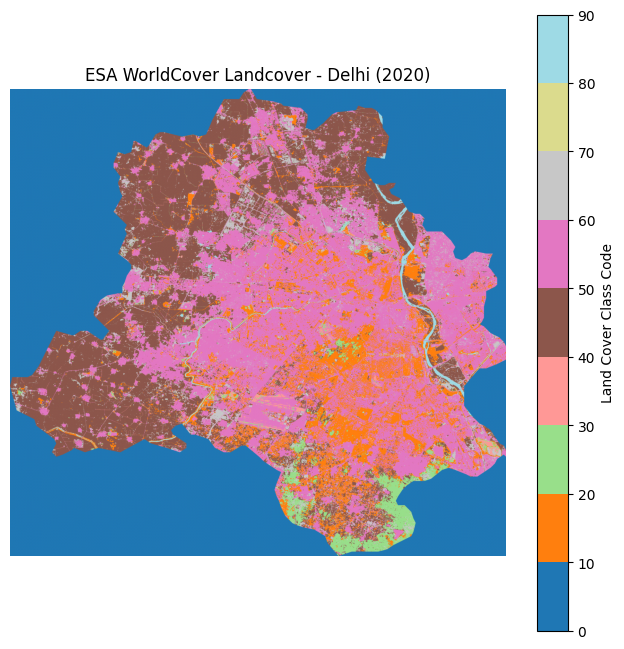

In [ ]:
#landcover dataset
!pip install rasterio matplotlib numpy

import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Mount Google Drive (skip if already mounted)
from google.colab import drive
drive.mount('/content/drive')

# --- Path to your Landcover GeoTIFF (Exported from GEE for Delhi) ---
lc_tif_path = '/content/drive/MyDrive/satellite_dataset_delhi/ESA_WorldCover_Delhi_2020.tif'

# Open GeoTIFF
with rasterio.open(lc_tif_path) as src:
    lc_data = src.read(1)
    lc_bounds = src.bounds
    lc_crs = src.crs

# Check unique land cover class codes present in your area
unique_classes = np.unique(lc_data)
print("Unique land cover class codes in Delhi:", unique_classes)

# --- Plot Land Cover Map ---
plt.figure(figsize=(8, 8))
extent = [lc_bounds.left, lc_bounds.right, lc_bounds.bottom, lc_bounds.top]
cmap = plt.cm.get_cmap('tab20', len(unique_classes))

im = plt.imshow(lc_data, extent=extent, cmap=cmap)
plt.title('ESA WorldCover Landcover - Delhi (2020)')
plt.colorbar(im, label='Land Cover Class Code')
plt.axis('off')
plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


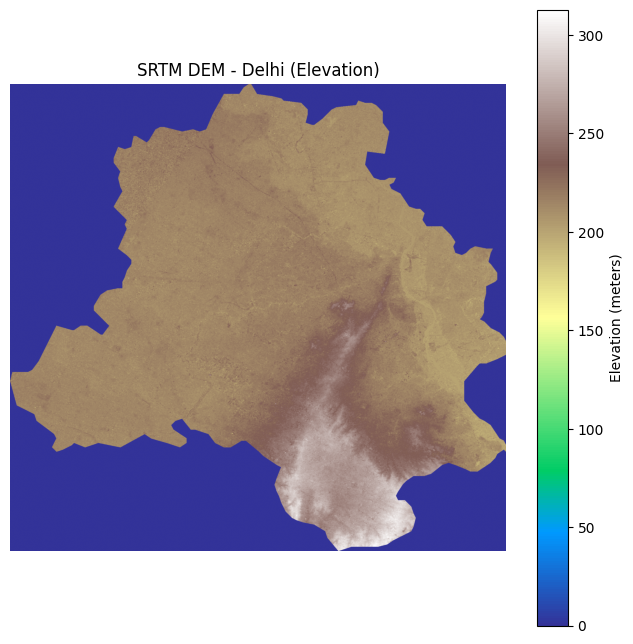

In [ ]:
#DEM dataset
!pip install rasterio matplotlib numpy

import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Mount Google Drive (skip if already mounted)
from google.colab import drive
drive.mount('/content/drive')

# Path to your DEM GeoTIFF
dem_tif_path = '/content/drive/MyDrive/satellite_dataset_delhi/SRTM_DEM_Delhi.tif'

# Open GeoTIFF
with rasterio.open(dem_tif_path) as src:
    dem_data = src.read(1)
    dem_bounds = src.bounds
    dem_crs = src.crs

# Mask NoData values (optional)
dem_data = np.where(dem_data == src.nodata, np.nan, dem_data)

# Plot DEM
plt.figure(figsize=(8, 8))
extent = [dem_bounds.left, dem_bounds.right, dem_bounds.bottom, dem_bounds.top]
plt.imshow(dem_data, extent=extent, cmap='terrain')
plt.colorbar(label='Elevation (meters)')
plt.title('SRTM DEM - Delhi (Elevation)')
plt.axis('off')
plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


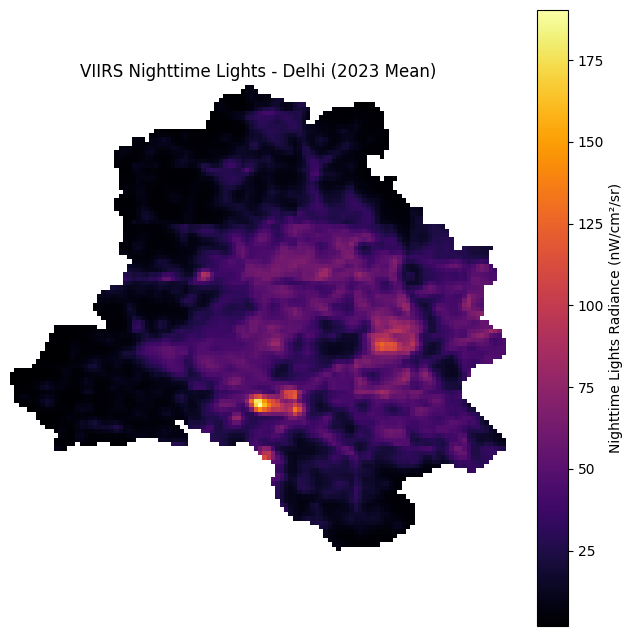

In [ ]:
#night time dataset
!pip install rasterio matplotlib numpy

import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Mount Google Drive (skip if already done)
from google.colab import drive
drive.mount('/content/drive')

# Path to your VIIRS NTL GeoTIFF
ntl_tif_path = '/content/drive/MyDrive/satellite_dataset_delhi/VIIRS_NTL_Mean_2023_Delhi.tif'

# Open NTL GeoTIFF
with rasterio.open(ntl_tif_path) as src:
    ntl_data = src.read(1)
    ntl_bounds = src.bounds
    ntl_crs = src.crs

# Mask NoData
ntl_data = np.where(ntl_data == src.nodata, np.nan, ntl_data)

# Plot Nighttime Lights Intensity
plt.figure(figsize=(8, 8))
extent = [ntl_bounds.left, ntl_bounds.right, ntl_bounds.bottom, ntl_bounds.top]
plt.imshow(ntl_data, extent=extent, cmap='inferno')
plt.colorbar(label='Nighttime Lights Radiance (nW/cm²/sr)')
plt.title('VIIRS Nighttime Lights - Delhi (2023 Mean)')
plt.axis('off')
plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Shapefile columns: Index(['ST_NM', 'geometry'], dtype='object')
Delhi-specific Population Density GeoTIFF saved at: /content/drive/MyDrive/GEE_Exports/WorldPop_Delhi_2020.tif
Population Data Min: 2.3237433
Population Data Max: 830.20233
Unique Population Values: [  2.3237433   2.341637    2.3537407 ... 822.89185   823.1595
 830.20233  ]


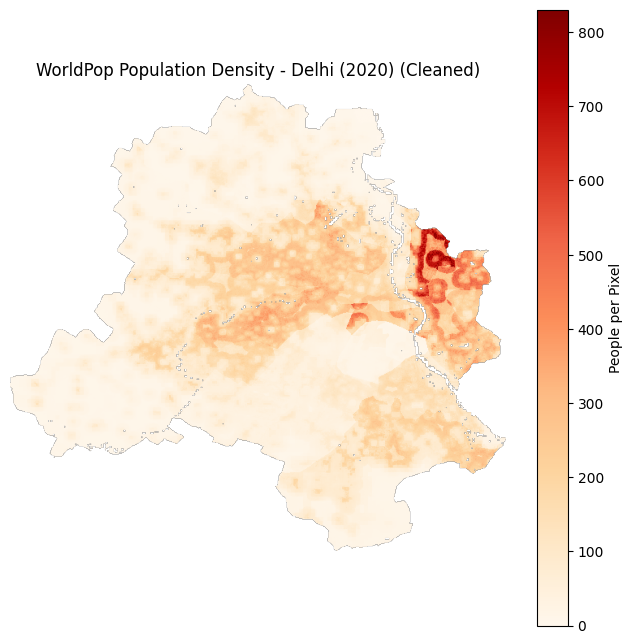

In [ ]:
#world population
# Install required packages
!pip install geopandas rasterio matplotlib numpy

import geopandas as gpd
import rasterio
import rasterio.mask
import matplotlib.pyplot as plt
import numpy as np

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# --- File Paths ---
worldpop_tif = '/content/drive/MyDrive/satellite_dataset_delhi/ind_ppp_2020.tif'  # Path to your downloaded WorldPop .tif
shapefile_path = '/content/drive/MyDrive/satellite_dataset_delhi/Admin2.shp'       # Path to your Delhi boundary shapefile

# --- Step 1: Read Delhi boundary shapefile ---
gdf = gpd.read_file(shapefile_path)
print("Shapefile columns:", gdf.columns)

# Assuming your state column is 'ST_NM' (Adjust if different)
delhi_boundary = gdf[gdf['ST_NM'].str.lower() == 'delhi']

# --- Step 2: Clip WorldPop raster to Delhi boundary ---
with rasterio.open(worldpop_tif) as src:
    delhi_boundary = delhi_boundary.to_crs(src.crs)  # Ensure CRS match
    geoms = delhi_boundary.geometry.values           # Get geometry for masking
    out_image, out_transform = rasterio.mask.mask(src, geoms, crop=True)
    out_meta = src.meta

# --- Step 3: Update output metadata for new raster ---
out_meta.update({
    "driver": "GTiff",
    "height": out_image.shape[1],
    "width": out_image.shape[2],
    "transform": out_transform
})

# Optional: Save the clipped Delhi Population raster
output_path = '/content/drive/MyDrive/GEE_Exports/WorldPop_Delhi_2020.tif'
with rasterio.open(output_path, "w", **out_meta) as dest:
    dest.write(out_image)

print("Delhi-specific Population Density GeoTIFF saved at:", output_path)

# --- Step 4: Mask negative values (NoData) ---
pop_data = out_image[0]  # First band
clean_data = np.where(pop_data < 0, np.nan, pop_data)  # Replace negative values with NaN

print("Population Data Min:", np.nanmin(clean_data))
print("Population Data Max:", np.nanmax(clean_data))
print("Unique Population Values:", np.unique(clean_data[~np.isnan(clean_data)]))

# --- Step 5: Plot Clean Population Density Map ---
plt.figure(figsize=(8, 8))
extent = [out_transform[2],
          out_transform[2] + out_transform[0] * pop_data.shape[1],
          out_transform[5] + out_transform[4] * pop_data.shape[0],
          out_transform[5]]

img = plt.imshow(clean_data, extent=extent, cmap='OrRd', vmin=0)  # vmin=0 to start from zero
plt.title('WorldPop Population Density - Delhi (2020) (Cleaned)')
plt.colorbar(img, label='People per Pixel')
plt.axis('off')
plt.show()



In [ ]:

# Install required packages
!pip install openaq pandas

# Note: The OpenAQ API requires an API key for some endpoints or higher usage limits.
# You can get an API key by signing up on their website: https://openaq.org/
# Once you have your key, you can store it securely in Colab's Secrets.
# Click the "🔑" icon in the left sidebar, add a new secret named 'OPENAQ_API_KEY'
# and paste your API key there.

from openaq import OpenAQ
import pandas as pd
from google.colab import userdata # Import userdata to access secrets

# Retrieve the API key from Colab secrets
api_key = userdata.get('OPENAQ_API_KEY')

# Initialize the OpenAQ API client with the API key
# If you don't have an API key, you might still be able to access some public data,
# but providing the key is recommended.
api = OpenAQ(api_key=api_key)

# Try fetching locations again
# Corrected way to access locations
status, resp = api.locations.list(city='Delhi', country='IN', limit=1000)


# Check if the API call was successful
if status == 200:
    station_list = []
    for loc in resp['results']:
        station_list.append({
            'Station': loc['location'],
            'Latitude': loc['coordinates']['latitude'],
            'Longitude': loc['coordinates']['longitude']
        })

    stations_df = pd.DataFrame(station_list)
    stations_df.to_csv('/content/drive/MyDrive/cpcb_station_coords.csv', index=False)
    print(stations_df.head())
else:
    print(f"Error fetching data from OpenAQ API: Status code {status}")
    print(resp) # Print the response for more details on the error

TypeError: Locations.list() got an unexpected keyword argument 'city'

In [ ]:
!pip install requests pandas

import requests
import pandas as pd

# API endpoint for Delhi locations
url = 'https://api.openaq.org/v2/locations'
params = {
    'country': 'IN',
    'city': 'Delhi',
    'limit': 1000
}

response = requests.get(url, params=params)

if response.status_code == 200:
    data = response.json()
    stations = []
    for item in data['results']:
        # Only include if coordinates exist
        if item.get('coordinates'):
            stations.append({
                'Station': item['name'],
                'Latitude': item['coordinates']['latitude'],
                'Longitude': item['coordinates']['longitude']
            })

    # Create DataFrame
    stations_df = pd.DataFrame(stations)
    print(stations_df.head())

    # Save to CSV
    stations_df.to_csv('/content/drive/MyDrive/cpcb_station_coords.csv', index=False)
    print("✅ Station coordinates CSV saved to: /content/drive/MyDrive/cpcb_station_coords.csv")
else:
    print(f"❌ API Error: {response.status_code}")


❌ API Error: 410


In [ ]:
import requests
import pandas as pd

# Your actual OpenAQ API Key pasted here
API_KEY = '8f3fc28c6532a24863815fd368705406ecceb35f68822a052cb7e2d04dc6d3d3'

# Set up the request
url = 'https://api.openaq.org/v2/locations'
params = {
    'country': 'IN',
    'city': 'Delhi',
    'limit': 1000
}
headers = {
    'x-api-key': API_KEY
}

# Make the request
response = requests.get(url, params=params, headers=headers)

if response.status_code == 200:
    data = response.json()['results']
    stations = []
    for item in data:
        if 'coordinates' in item:
            stations.append({
                'Station': item['name'],
                'Latitude': item['coordinates']['latitude'],
                'Longitude': item['coordinates']['longitude']
            })

    stations_df = pd.DataFrame(stations)
    stations_df.to_csv('/content/drive/MyDrive/cpcb_station_coordinates.csv', index=False)
    print(stations_df.head())
else:
    print("Error:", response.status_code, response.text)


Error: 410 {"message": "Gone. Version 1 and Version 2 API endpoints are retired and no longer available. Please migrate to Version 3 endpoints."}
